In [ ]:
import pandas as pd
data = pd.read_excel("data.xlsx")
data.head()

,SEX,EDUC,INDEPEND,CDRGLOB,NPISCORE,NACCGDS,FAQ,NACCMMSE,NACCAGEB,NACCAPOE,...,RCUNM,RENT,RENTM,RINFTEMM,Hippovol_Occort,Hippo_fr,Hippo_par,Temp_occort,Temp_par,Temp_fr
0,1,99,1,1,12,4,2,23,73,1,...,0.001041,0.003513,0.004086,0.002526,0.126450,0.042046,0.075462,2.144147,1.279577,0.712947
1,1,99,1,1,0,0,1,29,74,1,...,0.001654,0.003704,0.004827,0.002564,0.086455,0.037737,0.064686,1.615824,1.208971,0.705289
2,1,99,1,2,3,0,25,22,73,1,...,0.000811,0.004033,0.003522,0.002136,0.104945,0.035688,0.064903,2.288053,1.415045,0.778073
3,1,99,4,3,4,0,30,18,73,1,...,0.000752,0.003076,0.002382,0.001659,0.103015,0.035785,0.064656,2.228278,1.398555,0.774040
4,0,25,1,0,0,1,0,30,71,1,...,0.001264,0.003974,0.003697,0.002493,0.103726,0.033687,0.062293,2.064083,1.239595,0.670345


In [ ]:
MR_data = data.iloc[:,10:]

In [ ]:
MR_data.head()

,CSFVOL,GRAYVOL,WMHVOL,HIPPOVOL,CERETISS,LATVENT,FRCORT,OCCCORT,PARCORT,TEMPCOR,...,RCUNM,RENT,RENTM,RINFTEMM,Hippovol_Occort,Hippo_fr,Hippo_par,Temp_occort,Temp_par,Temp_fr
0,0.292152,0.531248,0.004900,0.006389,0.871991,0.019802,0.151948,0.050524,0.084661,0.108331,...,0.001041,0.003513,0.004086,0.002526,0.126450,0.042046,0.075462,2.144147,1.279577,0.712947
1,0.368581,0.597176,0.004121,0.006376,0.876882,0.027894,0.168972,0.073754,0.098575,0.119174,...,0.001654,0.003704,0.004827,0.002564,0.086455,0.037737,0.064686,1.615824,1.208971,0.705289
2,0.346972,0.591807,0.008354,0.005591,0.856409,0.093293,0.156661,0.053274,0.086141,0.121894,...,0.000811,0.004033,0.003522,0.002136,0.104945,0.035688,0.064903,2.288053,1.415045,0.778073
3,0.439212,0.551721,0.010212,0.005143,0.854985,0.105919,0.143722,0.049925,0.079544,0.111246,...,0.000752,0.003076,0.002382,0.001659,0.103015,0.035785,0.064656,2.228278,1.398555,0.774040
4,0.336681,0.597124,0.003368,0.006026,0.869324,0.022648,0.178872,0.058092,0.096730,0.119906,...,0.001264,0.003974,0.003697,0.002493,0.103726,0.033687,0.062293,2.064083,1.239595,0.670345


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MR_scaled = scaler.fit_transform(MR_data)
MR_scaled

array([[0.27429336, 0.31495106, 0.02594904, ..., 0.7822485 , 0.7340178 ,
        0.66667735],
       [0.5137701 , 0.58624189, 0.0218258 , ..., 0.58950048, 0.69351511,
        0.65951616],
       [0.44606307, 0.56414902, 0.0442461 , ..., 0.83474968, 0.8117274 ,
        0.72757697],
       ...,
       [0.69148082, 0.44257101, 0.01524551, ..., 0.71184192, 0.78070268,
        0.66819917],
       [0.63737968, 0.62709001, 0.17205586, ..., 0.63281583, 0.63382155,
        0.66857352],
       [0.51103198, 0.55599344, 0.20048655, ..., 0.91835355, 0.72824683,
        0.65967944]])

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(MR_scaled)

In [ ]:
clusters

array([5, 8, 2, ..., 2, 6, 9], dtype=int32)

In [ ]:
list_SS = []
for i in range (2,10):    
  clusterer = KMeans(n_clusters=i, random_state=10)
  cluster_labels = clusterer.fit_predict(MR_scaled)
  silhouette_avg = silhouette_score(MR_scaled, cluster_labels)
  list_SS.append(silhouette_avg)
list_SS

[0.14456717924041876,
 0.1337333435147112,
 0.10798295630463906,
 0.11458258621149457,
 0.0996597201283208,
 0.09953500143167839,
 0.09568718480177212,
 0.09171442068682371]

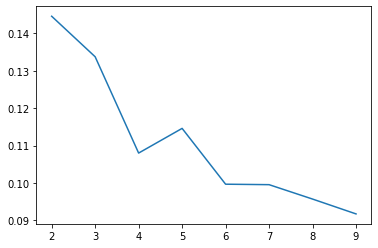

In [ ]:
plt.plot(xx,list_SS)

In [ ]:
xx = np.arange(2,10)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(MR_scaled)
clusters

array([2, 1, 4, ..., 0, 0, 2], dtype=int32)

In [ ]:
clusters_pd = pd.DataFrame(clusters)
clusters_pd.value_counts()

3    472
1    374
4    290
0    267
2    192
dtype: int64

In [ ]:
MR_data.pivot_table('CSFVOL', index=clusters, columns=data['CDRGLOB'], aggfunc="count")

CDRGLOB,0,1,2,3
0,66.0,93.0,73.0,35.0
1,245.0,116.0,13.0,NaN
2,122.0,56.0,12.0,2.0
3,395.0,65.0,11.0,1.0
4,146.0,85.0,41.0,18.0


In [ ]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
data_tsne = tsne.fit_transform(MR_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
list_SS = []
for i in range (2,10):    
  clusterer = KMeans(n_clusters=i, random_state=10)
  cluster_labels = clusterer.fit_predict(data_tsne)
  silhouette_avg = silhouette_score(data_tsne, cluster_labels)
  list_SS.append(silhouette_avg)
list_SS

[0.399417,
 0.38588968,
 0.40254787,
 0.40619043,
 0.41405478,
 0.40804332,
 0.3904577,
 0.38652024]

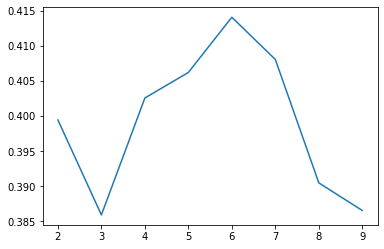

In [ ]:
plt.plot(xx,list_SS)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit_predict(data_tsne)
clusters

array([4, 1, 0, ..., 2, 2, 4], dtype=int32)

In [ ]:
clusters_pd = pd.DataFrame(clusters)
clusters_pd.value_counts()

2    314
3    274
5    270
1    260
0    242
4    235
dtype: int64

In [ ]:
MR_data.pivot_table('CSFVOL', index=clusters, columns=data['CDRGLOB'], aggfunc="count")

CDRGLOB,0,1,2,3
0,105.0,81.0,37.0,19.0
1,203.0,50.0,6.0,1.0
2,92.0,111.0,78.0,33.0
3,242.0,28.0,3.0,1.0
4,160.0,58.0,15.0,2.0
5,172.0,87.0,11.0,NaN


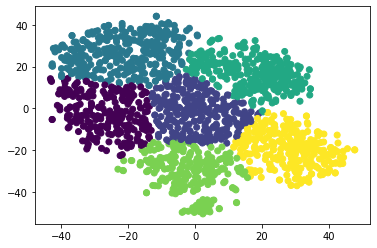

In [ ]:
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=clusters)

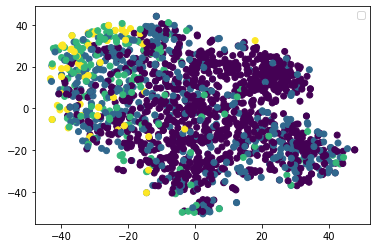

In [ ]:
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=data["CDRGLOB"])
plt.legend()

TASK-12: Instead of tSNE, please use (A) PCA, (B) LLE, (C) Isomap algorithms to provide a comparison among different approaches as we did for tSNE (finding the ideal number of clusters (silhouettee score, pivot tables, and scatter plots). As a final note, please use just the veery ffirst 2 components while using these algorithms. 